In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("placement.csv")

In [4]:
print(df)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
# Steps...
# 0. preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [11]:
df = df.iloc[:,1:]

In [12]:
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [13]:
import matplotlib.pyplot as plt

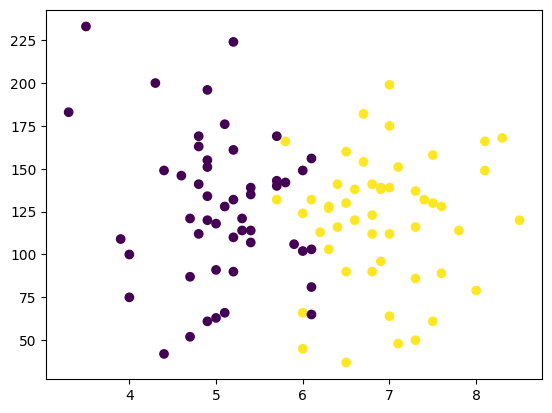

In [14]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [15]:
# Logistic regression...
# create line between placed and unplaced student

In [16]:
# Extract input and output cols...
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
print(x)
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [18]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1)

In [19]:
x_train

,cgpa,iq
66,6.9,96.0
83,7.5,130.0
57,6.5,130.0
79,6.5,90.0
17,3.3,183.0
...,...,...
76,4.9,155.0
45,6.0,66.0
78,6.1,81.0
19,5.2,132.0


In [20]:
y_train

66    1
83    1
57    1
79    1
17    0
     ..
76    0
45    1
78    0
19    0
74    1
Name: placement, Length: 90, dtype: int64

In [21]:
x_test

,cgpa,iq
21,7.1,151.0
88,4.4,149.0
87,5.7,132.0
43,6.8,141.0
97,6.7,182.0
85,5.8,166.0
47,5.2,161.0
39,4.6,146.0
69,8.5,120.0
44,7.5,61.0


In [22]:
y_test

21    1
88    0
87    1
43    1
97    1
85    1
47    0
39    0
69    1
44    1
Name: placement, dtype: int64

In [23]:
# scaling using StandardScaler
from sklearn.preprocessing import StandardScaler


In [24]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)

In [25]:
x_train

array([[ 0.83402482, -0.63959626],
       [ 1.3689101 ,  0.20802806],
       [ 0.47743464,  0.20802806],
       [ 0.47743464, -0.78917703],
       [-2.37528684,  1.5293248 ],
       [ 1.01231991, -1.83624237],
       [ 1.81464783, -1.06340842],
       [ 0.56658218, -0.04127321],
       [-0.77063101,  0.15816781],
       [-0.9489261 , -0.04127321],
       [-0.50318837,  0.3326787 ],
       [-0.77063101, -1.38750008],
       [-0.50318837, -0.36536486],
       [ 0.209992  , -0.2157841 ],
       [ 0.12084445, -0.46508537],
       [ 0.74487727,  0.03351717],
       [ 1.190615  , -0.88889753],
       [ 0.92317237,  1.32988378],
       [-0.23574573,  0.45732933],
       [ 1.190615  , -1.78638211],
       [-0.50318837,  0.43239921],
       [ 1.45805764,  0.15816781],
       [ 1.190615  ,  0.38253895],
       [ 0.12084445,  0.85621137],
       [ 0.38828709,  0.48225946],
       [ 0.03169691,  0.68170048],
       [-0.9489261 ,  0.30774857],
       [ 0.74487727, -0.24071423],
       [-1.03807365,

In [26]:
x_test = scalar.fit_transform(x_test)

In [27]:
x_test

array([[ 0.69653514,  0.32235484],
       [-1.46512565,  0.2585222 ],
       [-0.42432601, -0.28405525],
       [ 0.45635061,  0.00319163],
       [ 0.3762891 ,  1.31176077],
       [-0.3442645 ,  0.80109964],
       [-0.82463356,  0.64151804],
       [-1.30500263,  0.16277323],
       [ 1.8173963 , -0.6670511 ],
       [ 1.01678119, -2.550114  ]])

In [28]:
# Model creation and train the model..
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [29]:
 # it is used to train the model
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_pred,y_test)

0.8

In [34]:
pip install mlxtend

In [35]:
# Decision boundary...
from mlxtend.plotting import plot_decision_regions


<Axes: >

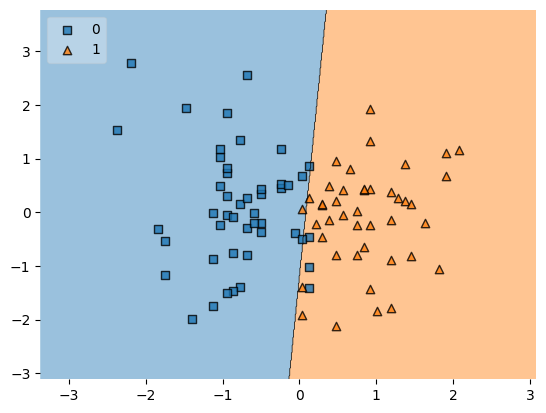

In [36]:
plot_decision_regions(x_train , y_train.values , clf=clf , legend=2)

In [39]:
prediction = clf.predict([[5.9,123.0]])

In [40]:
print(prediction[0])

0


In [41]:
import pickle

In [42]:
pickle.dump(clf, open('model.pkl','wb'))